# **TASK 2 : Car Price Prediction with Machine Learning**

● Collect car-related features like brand goodwill, horsepower, mileage, etc.

● Train a regression model to predict car prices based on these features.

● Handle data preprocessing, feature engineering, and model evaluation.

● Use Python libraries like Pandas, Scikit-learn and Matplotlib for the workflow.

● Understand real-world applications of machine learning in price prediction.

In [5]:
import pandas as pd
import numpy as np
import os
import kagglehub
# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")
print("Path to dataset files:", path)

100%|██████████| 18.1k/18.1k [00:00<00:00, 18.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hellbuoy/car-price-prediction/versions/1


In [19]:
df = pd.read_csv(os.path.join(path, 'CarPrice_Assignment.csv'))
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
df.shape

(205, 26)

In [23]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [24]:
df.shape

(205, 26)

In [25]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [28]:
df.duplicated().sum()

np.int64(0)

In [30]:
print(df['fueltype'].value_counts())
print(df['aspiration'].value_counts())
print(df['doornumber'].value_counts())

fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64


In [31]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [32]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


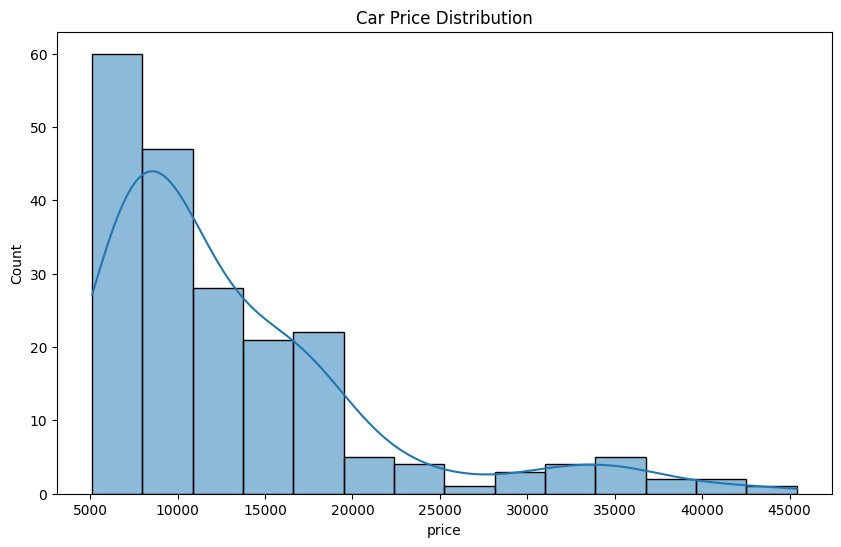

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True)
plt.title('Car Price Distribution')
plt.show()

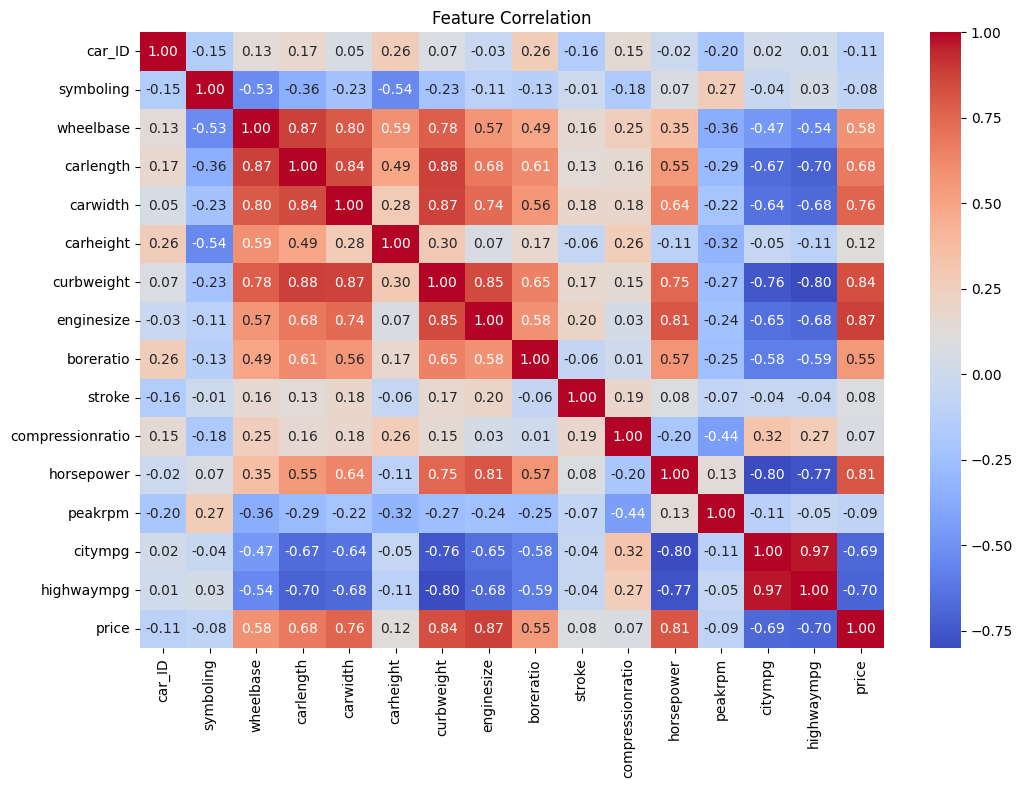

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Feature Correlation')
plt.show()

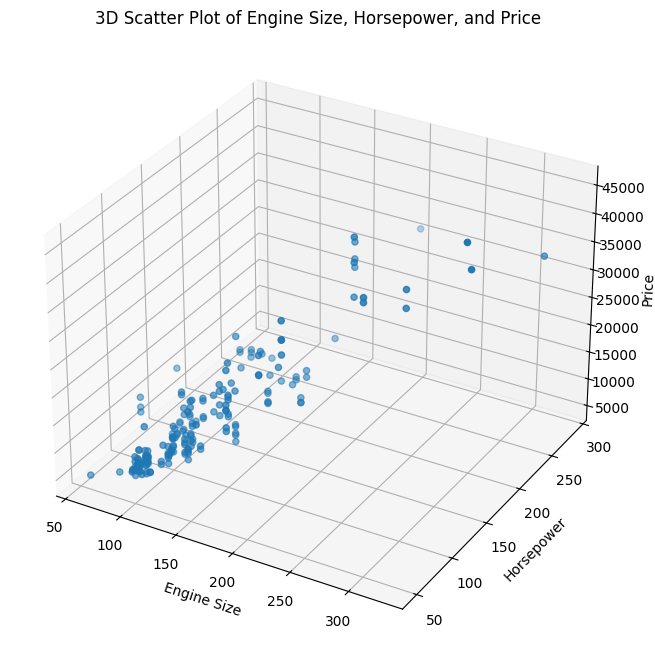

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Example: Plotting 'enginesize', 'horsepower', and 'price'
ax.scatter(df['enginesize'], df['horsepower'], df['price'])

ax.set_xlabel('Engine Size')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Engine Size, Horsepower, and Price')

plt.show()


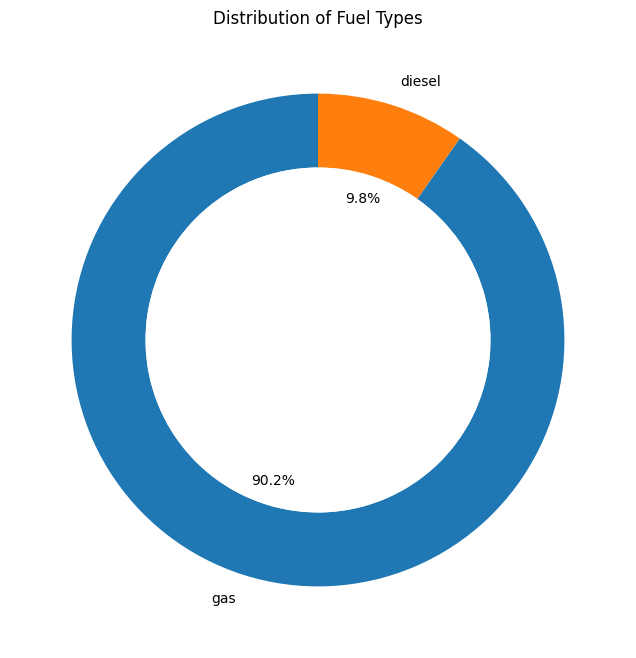

In [37]:

fuel_type_counts = df['fueltype'].value_counts()

# Create a donut chart (pie chart with a hole)
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle in the middle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set_title('Distribution of Fuel Types')
plt.show()

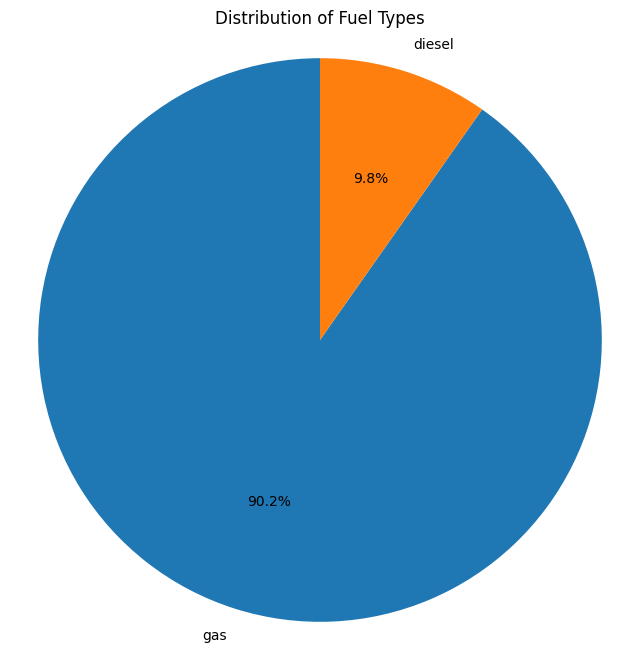

In [40]:
# Count the occurrences of each fuel type
fuel_type_counts = df['fueltype'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fuel Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

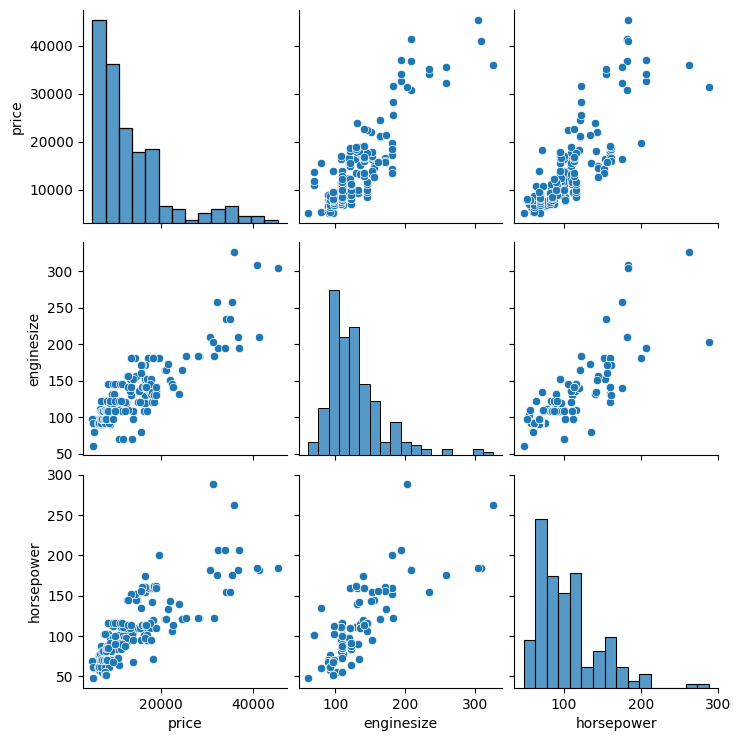

In [42]:
sns.pairplot(df[['price', 'enginesize', 'horsepower']])
plt.show()

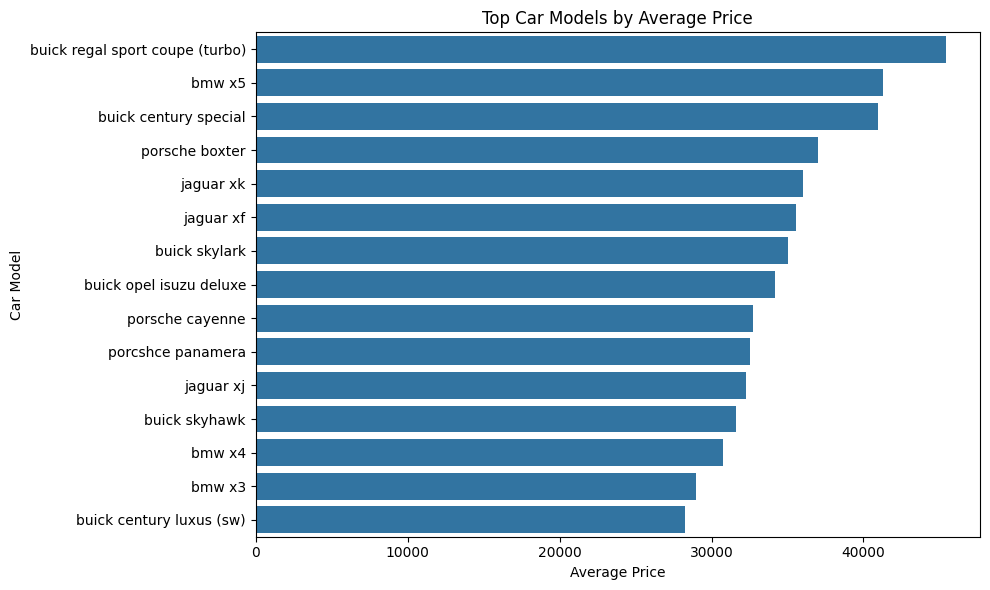

In [44]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top car models by average price
Top_car_models = avg_prices_by_car.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=Top_car_models.values, y=Top_car_models.index)
plt.title('Top Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [46]:
X = df.drop(['CarName','price'],axis=1)
y = df['price']

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# The previous code in this cell was for a classification task using Logistic Regression,
# which is not the goal of this notebook (car price prediction - regression).
# We have already preprocessed the data for regression in a previous step.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train a Linear Regression model (or choose another regression model)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_processed, y_train)

# Make predictions on the processed test data
y_pred = linear_reg_model.predict(X_test_processed)

# Evaluate the model
print("Linear Regression Model Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))

Linear Regression Model Performance:
Mean Absolute Error (MAE): 2154.7529771433155
Mean Squared Error (MSE): 9229934.77655462
R-squared (R2): 0.8830825352736372


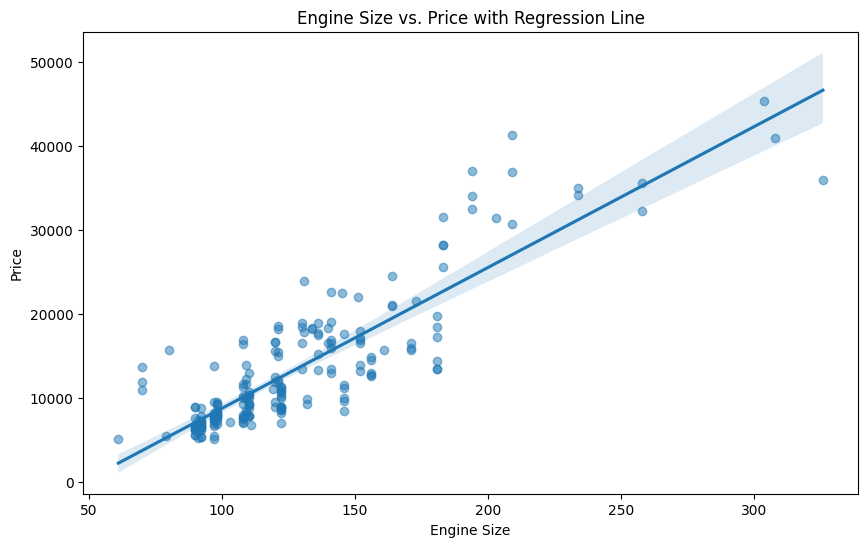

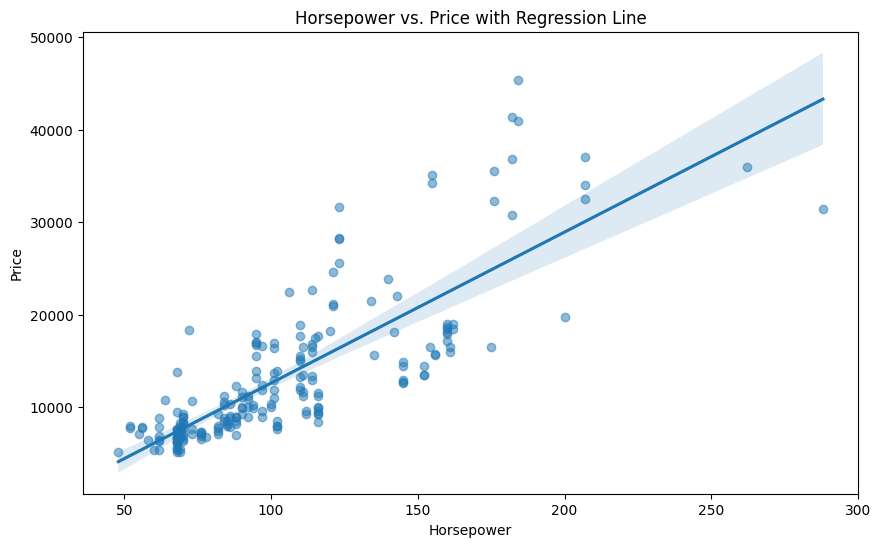

In [57]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='enginesize', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title('Engine Size vs. Price with Regression Line')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='horsepower', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title('Horsepower vs. Price with Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

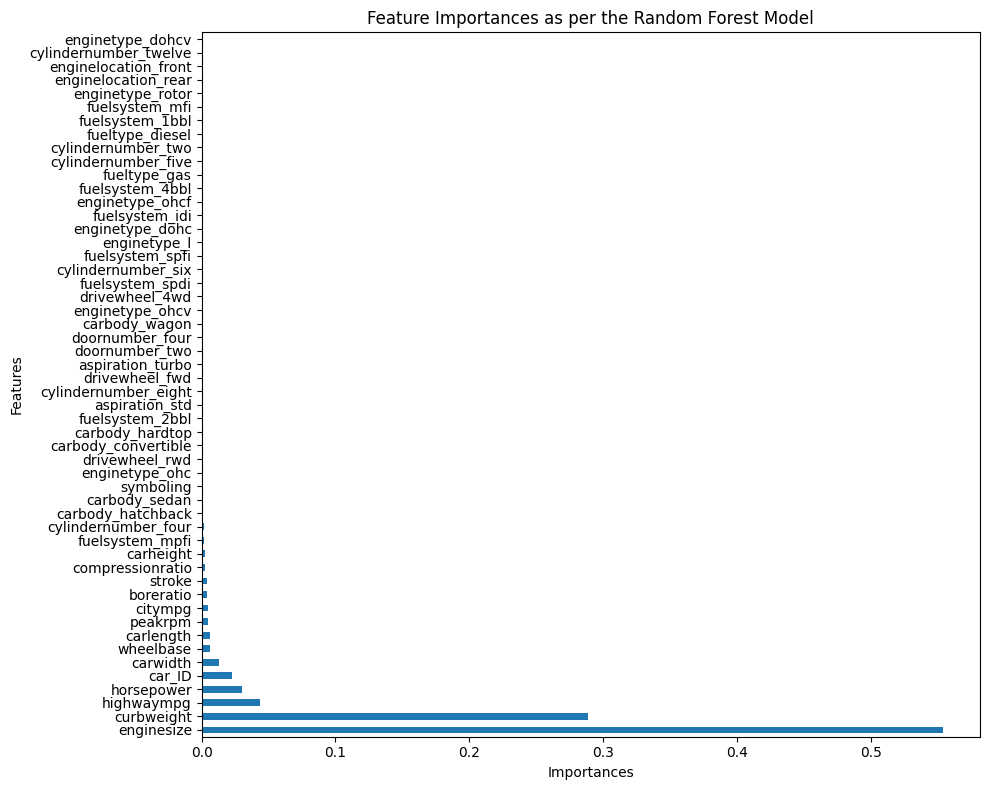

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a RandomForestRegressor model
# Using random_state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Get feature importances
# The feature importances are ordered according to the features in X_train_processed
# We need to get the corresponding feature names after one-hot encoding
# This requires accessing the feature names from the preprocessor
feature_names = numerical_features.tolist() + \
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

feature_imps = pd.Series(rf_model.feature_importances_, index=feature_names)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_imps.sort_values(ascending=False).plot(kind='barh') # Sort for better visualization
plt.ylabel('Features')
plt.xlabel('Importances')
plt.title('Feature Importances as per the Random Forest Model')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [60]:
pred_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Price,Predicted Price,Difference
15,30760.000,28654.981860,2105.018140
9,17859.167,19522.392687,-1663.225687
100,9549.000,10131.158486,-582.158486
132,11850.000,13100.768018,-1250.768018
68,28248.000,27366.954358,881.045642
95,7799.000,5607.060596,2191.939404
159,7788.000,8031.781020,-243.781020
162,9258.000,6383.531873,2874.468127
147,10198.000,9416.048423,781.951577
182,7775.000,8446.302540,-671.302540


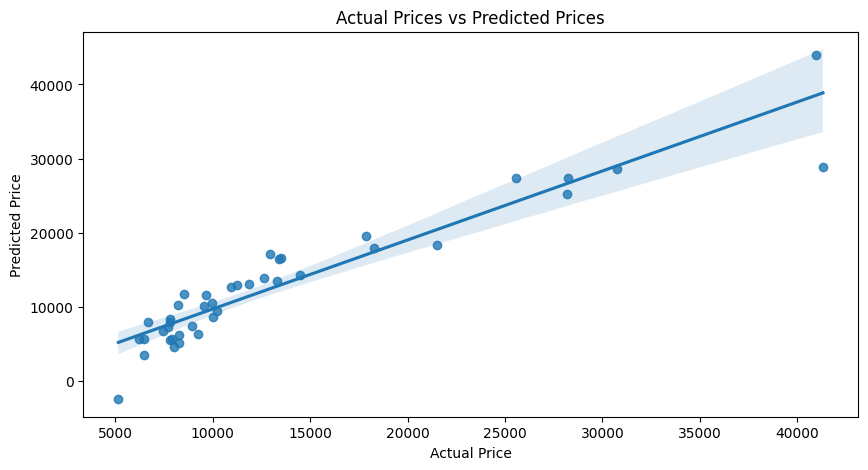

In [61]:
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()